In [1]:
import random

import pandas as pd
import os
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import MaxNLocator


### Loading data


In [2]:
root_dir = os.path.abspath(os.curdir)  # Doesn't work as intended. Needs fix below.
root_dir = root_dir[:-9]
results_dir = root_dir + "results/"
# file_name = "belief_distributions_before_after.csv"
# file_name = "belief_distr_{'NormalUser': 1.0, 'Disinformer': 0.0}.csv"    # tiny experiment to see whether roughly makes sense?
# file_name = "belief_distr_{'NormalUser': 0.99, 'Disinformer': 0.01}.csv"  # Actual experiment condition
# file_name = "belief_distr_{'NormalUser': 0.8, 'Disinformer': 0.2}.csv"      # Ratio validation
# file_name = "belief_distr_{'NormalUser': 0.95, 'Disinformer': 0.05}.csv"
file_name = "validation_n_agents.csv"

file_dir = results_dir + file_name

data = pd.read_csv(file_dir)


In [3]:
data.head(5)


,Unnamed: 0,Replication,"((0.0, <SelectAgentsBy.RANDOM: 0>), False)"
0,0,0,"([1, 70, 36, 9, 75, 60, 54, 6, 67, 19, 25, 11,..."
1,1,1,"([80, 73, 21, 28, 76, 99, 38, 5, 16, 91, 24, 2..."
2,2,2,"([87, 16, 58, 31, 95, 69, 58, 4, 42, 5, 4, 59,..."
3,3,3,"([50, 82, 84, 55, 54, 34, 21, 8, 13, 20, 46, 9..."
4,4,4,"([51, 81, 3, 92, 50, 63, 67, 5, 51, 50, 39, 38..."


### Reshaping data

In [4]:
# data.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
data.rename({"Unnamed: 0":"a", "((0.0, <SelectAgentsBy.RANDOM: 0>), False)":"0_MLI_0_R"}, axis="columns", inplace=True)  # Validation
data.drop(["a", "Replication"], axis=1, inplace=True)
data.head(5)

,0_MLI_0_R
0,"([1, 70, 36, 9, 75, 60, 54, 6, 67, 19, 25, 11,..."
1,"([80, 73, 21, 28, 76, 99, 38, 5, 16, 91, 24, 2..."
2,"([87, 16, 58, 31, 95, 69, 58, 4, 42, 5, 4, 59,..."
3,"([50, 82, 84, 55, 54, 34, 21, 8, 13, 20, 46, 9..."
4,"([51, 81, 3, 92, 50, 63, 67, 5, 51, 50, 39, 38..."


In [5]:
# Rename columns
# column_names = ["0%_True", "0%_False","0%_True", "0%_False","0%_True", "0%_False","0%_True", "0%_False",]
# data.rename({"((0.0, <SelectAgentsBy.RANDOM: 0>), True)":"0%,\nR",
#              "((0.0, <SelectAgentsBy.RANDOM: 0>), False)":"0%,\n–",
#              "((0.1, <SelectAgentsBy.RANDOM: 0>), True)":"10%,\nR",
#              "((0.1, <SelectAgentsBy.RANDOM: 0>), False)":"10%,\n–",
#              "((0.25, <SelectAgentsBy.RANDOM: 0>), True)":"25%,\nR",
#              "((0.25, <SelectAgentsBy.RANDOM: 0>), False)":"25%,\n–",
#              # "((0.9, <SelectAgentsBy.RANDOM: 0>), True)":"90%,\nR",
#              # "((0.9, <SelectAgentsBy.RANDOM: 0>), False)":"90%,\n–"
#              }, axis="columns", inplace=True)

# For Ratio-Validation:
# data.rename({"((0.0, <SelectAgentsBy.RANDOM: 0>), False)":"0_MLI_0_R"})

In [6]:
# Switch Columns (first w/o ranking, then w/ranking)
# data = data[["0%,\n–", "0%,\nR",
#              "10%,\n–", "10%,\nR",
#              "25%,\n–", "25%,\nR",
#              # "90%,\n–", "90%,\nR",
#              ]]

data.head(5)


,0_MLI_0_R
0,"([1, 70, 36, 9, 75, 60, 54, 6, 67, 19, 25, 11,..."
1,"([80, 73, 21, 28, 76, 99, 38, 5, 16, 91, 24, 2..."
2,"([87, 16, 58, 31, 95, 69, 58, 4, 42, 5, 4, 59,..."
3,"([50, 82, 84, 55, 54, 34, 21, 8, 13, 20, 46, 9..."
4,"([51, 81, 3, 92, 50, 63, 67, 5, 51, 50, 39, 38..."


### Histogram


In [7]:
# Overview of the agents' belief distribution at the end
# for policy in data.columns:
policies = data.columns
policy_nr = 0

policy_data = data.iloc[:,policy_nr]  # [0]

In [8]:
def convert(string):
    """
    Converts the String of each cell within the dataframe into two lists of agent beliefs
    (before and after the run)
    @:param string: String, the entry of one cell, i.e., "([beliefs_before], [beliefs_after])" of 1 policy & 1 run
    :return before: list of floats, each in domain [0,100]
    :return after: list of floats, each in domain [0,100]
    """
    # remove tuple parentheses
    string = string[2:-2]

    # split before <> after
    before, after = list(string.split("], ["))

    # convert from string to lists
    before = list(before.split(", "))
    after = list(after.split(", "))

    # convert individual values from String to float
    before = [float(s) for s in before]
    after = [float(s) for s in after]

    return before, after

## Preparing the lists (before & after)

In [9]:
# Pick result cell & get its data
run_id = 0
policy_nr = 0

policy_data = data.iloc[:,policy_nr]
row = policy_data[run_id]
before, after = convert(row)


# Plotting

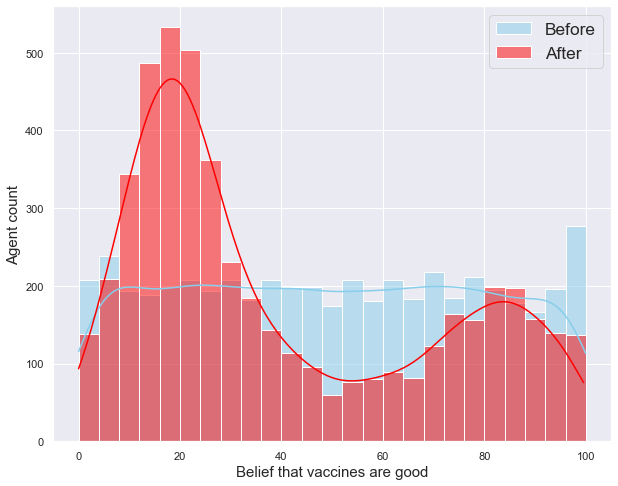

In [10]:
# 1 Histogram
sns.set(style="darkgrid", rc={'figure.figsize':(10, 8)})

sns.histplot(data=before, color="skyblue", label="Before", kde=True, bins=25, binrange=(0,100))
sns.histplot(data=after, color="red", label="After", kde=True, bins=25, binrange=(0,100))

plt.legend(fontsize='x-large')
plt.xlabel("Belief that vaccines are good", fontsize=15)
plt.ylabel("Agent count", fontsize=15)
# plt.title("Beliefs Before and After", fontsize=22)

directory = os.getcwd()
root_directory = os.path.dirname(directory)
visualization_folder = root_directory + '/results/images/'
plt.savefig(visualization_folder + f"validation_media_literacy.png", dpi=200, bbox_inches="tight", pad_inches=0.1)

plt.show()


In [11]:
def create_title(policy):
    interventions = policy.split(",\n")
    media_lit = interventions[0] + " Media Literacy intervention,\n"

    if interventions[1] == "R":
        ranking = "Ranking Intervention"
    else:
        ranking = "Conventional Ranking"

    title = media_lit + ranking
    return title


# Subplots

In [17]:
def create_subplot(df, policy_name='0%,\n–', n_rows=3, n_cols=3, saving=False,  title=False, x_ticks=5, y_ticks=5):
    """
    Create and potentially save a subplot of the requested policy and number of subplots (via nrows & ncols).
    :param saving:
    :param n_cols:
    :param n_rows:
    :param df:
    :param policy_name:
    :param nrows:
    :param ncols:
    :return:
    """
    # Get data of the requested policy
    policy_data = df[[policy_name]]

    # Sample depicted runs
    n_runs = len(policy_data)
    run_ids = random.sample(range(n_runs), k=n_rows*n_cols)

    # Convert & Join data
    subplot_data = {}
    for run_id in run_ids:
        run_data = policy_data.iloc[run_id,0]
        before, after = convert(run_data)
        subplot_data[run_id] = (before, after)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, sharex="all", sharey="all", figsize=(10.8, 8))
    ids = list(subplot_data.keys())

    # Create subplots
    for row in range(n_rows):
        for col in range(n_cols):

            # Plot 1 hist (incl. before & after)
            id = ids.pop()
            data = subplot_data[id]
            before, after = data
            sns.histplot(data=before, color="skyblue", label="Before", kde=True, bins=25, binrange=(0,100), ax=axes[row, col])
            sns.histplot(data=after, color="red", label="After", kde=True, bins=25, binrange=(0,100), ax=axes[row, col])

            # Depict information (labels etc)
            # - replication number
            anc = AnchoredText(f'Run {id}', loc="upper center", frameon=False)
            axes[row, col].add_artist(anc)

            # - y axis
            if col == 0:
                axes[row, col].set_ylabel("Agent count")
                axes[row, col].yaxis.set_major_locator(MaxNLocator(y_ticks))
            # - x axis
            if row == n_rows-1:
                axes[row, col].set_xlabel("Belief that vaccines are good")
                axes[row, col].xaxis.set_major_locator(MaxNLocator(x_ticks))
            # - legend
            if row == 0 and col == n_cols-1:
                axes[row, col].legend(fontsize='large', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

    if title:
        plt.suptitle(f"Policy:\n {create_title(policy_name)}", fontsize='x-large')

    if saving:
        directory = os.getcwd()
        root_directory = os.path.dirname(directory)
        visualization_folder = root_directory + '/results/images/'
        # fig.savefig(visualization_folder + f"belief_distributions_{policy_name}.png", dpi=200, bbox_inches="tight", pad_inches=0.1)
        fig.savefig(visualization_folder + f"5000_agents_belief_distributions_{policy_name}.png", dpi=200, bbox_inches="tight", pad_inches=0.1)

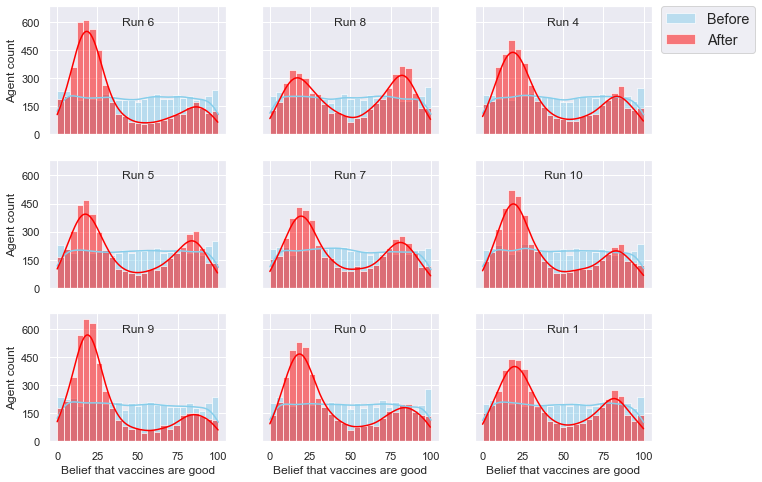

In [18]:
# Create 1 figure for each policy
for p in policies:
    create_subplot(data, policy_name=p, title=False, saving=True, n_rows=3, n_cols=3)


In [ ]:
# Create data for avg histogram over policy

# Create subplot figure of averages over 50 runs